<a href="https://colab.research.google.com/github/Khushboo-Sachdeva/bonstonhouseprice/blob/main/House_price_prediction_1369.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This notebook covers step by step process of builing a Machine Learning model to predict House price. It will also covers every important steps one need to take when building a Machine Learning model like 

    1. Undestanding the problem
    2. EDA
    3. Data Preprocessing
    4. Feature Selection  
    5. Modeling 
    6. Evaluation.

## Understanding the problem

A dataset was given which has 81 explanatory variables describing (almost) every aspect of residential homes. We need to find prices of new houses using Machine Learning. 

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn import metrics

### Loading Dataset


In [ ]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_rows',None)

In [ ]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

### Basic Checks


In [ ]:
# head() shows the first 5 rows of the data
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [ ]:
# tail() shows the bottom 5 rows of the data
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [ ]:
data.shape

(1460, 81)

In [ ]:
# information of numerical columns
data.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [ ]:
# information of Categorical Columns
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        1141     1434         515         504        864       906   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       1460       1460     1423     1423         1422         1423   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        1282        647      649     1311          953          430   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          1422    1460      1460       1460       1459        1460   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           1256    1428       741       1365       1334         735   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        1460         770       1379         1379       1379       1379   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         1360         380        870          605       1311       1326   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        1460      7    281          54     1460          1460  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         1340      3    157          49     1267          1198

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Insights

From data set we can observe that in data set

1 . total columns - 81

a . in 81 columns 1st Id column is not usefull for our target Column
b . from the data we can consider target column is  salesprice ( last column)
c . total 4 time data basis columns
    * YearBuilt * YearRemodAdd * YrSold * GarageYrBlt

2 . total 1460 rows present

3 . from the discription of data we can say that there is 2 type of columns in data set

a . Numerical Type 
    * Descrete type  - 35
    * continuos type  - 3
    
b . categorical type - 43

### Exploratory Data Analysis

#### 1: Univariate Analysis

In [ ]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### 2: Bivariate Analysis

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()

Imported v0.1.55. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


In [ ]:
df=AV.AutoViz(filename='house_pricing.csv',verbose=1,chart_format='html')
%matplotlib inline

    pandas ascii encoder does not work for this file. Continuing...
    pandas utf-8 encoder does not work for this file. Continuing...
    pandas iso-8859-1 encoder does not work for this file. Continuing...
    pandas cp1252 encoder does not work for this file. Continuing...
    pandas latin1 encoder does not work for this file. Continuing...
Not able to read or load file. Please check your inputs and try again...


### Insights

#### For Continuous data

Conclusion:-

1. lot of features are having skewness and also kurtosis - we will try to normalise using MinMaxScaler

2. From univariate analysis we can say that 
    BsmtFinSF2, LowQualFinSF, EnclosedPorch, SsnPorch, ScreenPorch, MiscVal
    this columns are Lying towards zero ,so we can drop that columns

3. From Univariate analysis for Continuous data we can say that
    Saleprice, LotArea, LotFrontage, GrLivArea, FstFlrSF  these columns 
    does not include 0 datapoints in it , so we can apply log transform to these columns

4. we will apply scaling to SalePrice befor model creation

#### For discrete data

From the Univariate analysis of discrete Columns we can say that 
    PoolArea, KitchenAbvGr, BsmtHalfBath 
    are biased data, so we can drop that columns

#### Dropping columns:

From the univariate analysis we can drop Biased columns

'Street','LandContour','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
'Functional','GarageQual','GarageCond'

## Data Preprocessing & Feature Engineering

steps to perform in feature engineering

1.Check missing values.Check for corrupted value if anY.  
2.Convert categorical values into numerical.  
3.Handle outliers.  
4.Scale the data.   
5.Transformation of data.   
6.Balance the data.  

###  Missing value handling

We will be replacing the null values with mode for categorical values and mean/median for continous values.    
We will delete columns with more than 80% null values/missing value as the available information add no value for our model.  

In [ ]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
data_single_value = data[["PoolArea","MiscVal","Street","LandContour","Utilities","SaleType",'SaleCondition','LandSlope',
           'Condition1','Condition2','BldgType','GarageQual','GarageCond','PavedDrive','EnclosedPorch',
           '3SsnPorch','ScreenPorch','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional','Exterior2nd',
           'ExterQual',"BsmtCond","BsmtFinType1","Heating",'TotalBsmtSF','BsmtQual','BsmtFinType2','BsmtFinSF2',
           'FireplaceQu','Electrical']]

In [ ]:
col = 1
for i in data_single_value:
    print('Unique Values in  = ',i)
    print('Count of unique values of',i,' =\n',data_single_value[i].value_counts())
    col = col+1
    print('\n')

Unique Values in  =  PoolArea
Count of unique values of PoolArea  =
 0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64


Unique Values in  =  MiscVal
Count of unique values of MiscVal  =
 0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64


Unique Values in  =  Street
Count of unique values of Street  =
 Pave    1454
Grvl       6
Name: Street, dtype: int64


Unique Values in  =  LandContour
Count of unique values of LandContour  =
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Unique Values in  =  Utilities
Count of unique values of Utilities  =
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Uni

In [ ]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

### Observation

* ID is an index numbers column so dropping ID column.
* from above Unique value observation we found that these below listed columns are having more than 80% of single (constant) value is we drop these columns       ['Alley','PoolQC','MiscFeature','Fence',"ScreenPorch","PoolArea","MiscVal","Street",
           "LandContour","Utilities","SaleType",'SaleCondition','LandSlope',
           'Condition1','Condition2','BldgType','GarageQual','GarageCond','PavedDrive','EnclosedPorch',
           '3SsnPorch','ScreenPorch','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional',"BsmtCond",
           "Heating",'BsmtFinType2','BsmtFinSF2','Electrical']

* From above observation ckeck for skewnee and Kurtosis for these columns Exterior2nd, ExterQual,BsmtFinType1,TotalBsmtSF(contains zero value) 

* From above observation MasVnrType has none values more than 50% so we drop this coulumn

In [ ]:
# BsmtQual, FireplaceQu

#### Dropping Unwanted Features

In [ ]:
data.drop(['Id','Alley','PoolQC','MiscFeature','Fence',"ScreenPorch","PoolArea","MiscVal","Street",
           "LandContour","Utilities","SaleType",'SaleCondition','LandSlope',
           'Condition1','Condition2','BldgType','GarageQual','GarageCond','PavedDrive','EnclosedPorch',
           '3SsnPorch','ScreenPorch','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','Functional',"BsmtCond",
           "Heating",'BsmtFinType2','BsmtFinSF2','Electrical','MasVnrType'],axis=1,inplace=True)

In [ ]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
# SInce null valuses are 48% of Total column value
data.drop(['FireplaceQu'], axis=1, inplace=True)

In [ ]:
data['MasVnrArea'].value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [ ]:
# SInce zero valuses are 59% of Total column value
data.drop(['MasVnrArea'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
LotShape          0
LotConfig         0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
CentralAir        0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [ ]:
# for numerical features
data['LotFrontage'].fillna(int(data['LotFrontage'].median()),inplace=True)
data['GarageYrBlt'].fillna((data['GarageYrBlt'].median()),inplace=True)

In [ ]:
# for categorical features
data['BsmtQual'].fillna((data['BsmtQual'].mode()[0]),inplace=True)
data['BsmtExposure'].fillna((data['BsmtExposure'].mode()[0]),inplace=True)
data['BsmtFinType1'].fillna((data['BsmtFinType1'].mode()[0]),inplace=True)
data['GarageType'].fillna((data['GarageType'].mode()[0]),inplace=True) 
data['GarageFinish'].fillna((data['GarageFinish'].mode()[0]),inplace=True)

In [ ]:
# Since these two features 1stFlrSF and 2ndFlrSF are contains numeric values hence change it to frstflrSR and scndflrSF
data.rename(columns = {'1stFlrSF':'frstflrSR', '2ndFlrSF':'scndflrSF'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  RoofStyle     1460 non-null   object 
 13  RoofMatl      1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  ExterQual     1460 non-null   object 
 17  ExterCond     1460 non-null   object 
 18  Foundation    1460 non-null 

In [ ]:
data.to_csv("next_data.csv",index=False)

In [ ]:
data2 = pd.read_csv("next_data.csv")
pd.reset_option('display.max_rows',None)
data2

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
0             60       RL         65.0     8450      Reg    Inside   
1             20       RL         80.0     9600      Reg       FR2   
2             60       RL         68.0    11250      IR1    Inside   
3             70       RL         60.0     9550      IR1    Corner   
4             60       RL         84.0    14260      IR1       FR2   
...          ...      ...          ...      ...      ...       ...   
1455          60       RL         62.0     7917      Reg    Inside   
1456          20       RL         85.0    13175      Reg    Inside   
1457          70       RL         66.0     9042      Reg    Inside   
1458          20       RL         68.0     9717      Reg    Inside   
1459          20       RL         75.0     9937      Reg    Inside   

     Neighborhood HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         CollgCr     2Story            7            5       2003   
1         Veenker     1Story            6            8       1976   
2         CollgCr     2Story            7            5       2001   
3         Crawfor     2Story            7            5       1915   
4         NoRidge     2Story            8            5       2000   
...           ...        ...          ...          ...        ...   
1455      Gilbert     2Story            6            5       1999   
1456       NWAmes     1Story            6            6       1978   
1457      Crawfor     2Story            7            9       1941   
1458        NAmes     1Story            5            6       1950   
1459      Edwards     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd ExterQual  \
0             2003     Gable  CompShg     VinylSd     VinylSd        Gd   
1             1976     Gable  CompShg     MetalSd     MetalSd        TA   
2             2002     Gable  CompShg     VinylSd     VinylSd        Gd   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        TA   
4             2000     Gable  CompShg     VinylSd     VinylSd        Gd   
...            ...       ...      ...         ...         ...       ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        TA   
1456          1988     Gable  CompShg     Plywood     Plywood        TA   
1457          2006     Gable  CompShg     CemntBd     CmentBd        Ex   
1458          1996       Hip  CompShg     MetalSd     MetalSd        TA   
1459          1965     Gable  CompShg     HdBoard     HdBoard        Gd   

     ExterCond Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0           TA      PConc       Gd           No          GLQ         706   
1           TA     CBlock       Gd           Gd          ALQ         978   
2           TA      PConc       Gd           Mn          GLQ         486   
3           TA     BrkTil       TA           No          ALQ         216   
4           TA      PConc       Gd           Av          GLQ         655   
...        ...        ...      ...          ...          ...         ...   
1455        TA      PConc       Gd           No          Unf           0   
1456        TA     CBlock       Gd           No          ALQ         790   
1457        Gd      Stone       TA           No          GLQ         275   
1458        TA     CBlock       TA           Mn          GLQ          49   
1459        TA     CBlock       TA           No          BLQ         830   

      BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  frstflrSR  scndflrSF  \
0           150          856        Ex          Y        856        854   
1           284         1262        Ex          Y       1262          0   
2           434          920        Ex          Y        920        866   
3           540          756        Gd          Y        961        756   
4           490         1145        Ex          Y       1145       1053   
...         ...          ...       ...        ...        ...        ... 

### Handling Outliers

In [ ]:
data_cat = data2.select_dtypes('object') # categorial data

In [ ]:
data_cat

MSZoning LotShape LotConfig Neighborhood HouseStyle RoofStyle RoofMatl  \
0          RL      Reg    Inside      CollgCr     2Story     Gable  CompShg   
1          RL      Reg       FR2      Veenker     1Story     Gable  CompShg   
2          RL      IR1    Inside      CollgCr     2Story     Gable  CompShg   
3          RL      IR1    Corner      Crawfor     2Story     Gable  CompShg   
4          RL      IR1       FR2      NoRidge     2Story     Gable  CompShg   
...       ...      ...       ...          ...        ...       ...      ...   
1455       RL      Reg    Inside      Gilbert     2Story     Gable  CompShg   
1456       RL      Reg    Inside       NWAmes     1Story     Gable  CompShg   
1457       RL      Reg    Inside      Crawfor     2Story     Gable  CompShg   
1458       RL      Reg    Inside        NAmes     1Story       Hip  CompShg   
1459       RL      Reg    Inside      Edwards     1Story     Gable  CompShg   

     Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual  \
0        VinylSd     VinylSd        Gd        TA      PConc       Gd   
1        MetalSd     MetalSd        TA        TA     CBlock       Gd   
2        VinylSd     VinylSd        Gd        TA      PConc       Gd   
3        Wd Sdng     Wd Shng        TA        TA     BrkTil       TA   
4        VinylSd     VinylSd        Gd        TA      PConc       Gd   
...          ...         ...       ...       ...        ...      ...   
1455     VinylSd     VinylSd        TA        TA      PConc       Gd   
1456     Plywood     Plywood        TA        TA     CBlock       Gd   
1457     CemntBd     CmentBd        Ex        Gd      Stone       TA   
1458     MetalSd     MetalSd        TA        TA     CBlock       TA   
1459     HdBoard     HdBoard        Gd        TA     CBlock       TA   

     BsmtExposure BsmtFinType1 HeatingQC CentralAir KitchenQual GarageType  \
0              No          GLQ        Ex          Y          Gd     Attchd   
1              Gd          ALQ        Ex          Y          TA     Attchd   
2              Mn          GLQ        Ex          Y          Gd     Attchd   
3              No          ALQ        Gd          Y          Gd     Detchd   
4              Av          GLQ        Ex          Y          Gd     Attchd   
...           ...          ...       ...        ...         ...        ...   
1455           No          Unf        Ex          Y          TA     Attchd   
1456           No          ALQ        TA          Y          TA     Attchd   
1457           No          GLQ        Ex          Y          Gd     Attchd   
1458           Mn          GLQ        Gd          Y          Gd     Attchd   
1459           No          BLQ        Gd          Y          TA     Attchd   

     GarageFinish  
0             RFn  
1             RFn  
2             RFn  
3             Unf  
4             RFn  
...           ...  
1455          RFn  
1456          Unf  
1457          RFn  
1458          Unf  
1459          Fin  

[1460 rows x 20 columns]

In [ ]:
data_num = data2.select_dtypes('number') # numerical data

In [ ]:
data_num

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  frstflrSR  scndflrSF  \
0             2003         706        150          856        856        854   
1             1976         978        284         1262       1262          0   
2             2002         486        434          920        920        866   
3             1970         216        540          756        961        756   
4             2000         655        490         1145       1145       1053   
...            ...         ...        ...          ...        ...        ...   
1455          2000           0        953          953        953        694   
1456          1988         790        589         1542       2073          0   
1457          2006         275        877         1152       1188       1152   
1458          1996          49          0         1078       1078          0   
1459          1965         830        136         1256       1256          0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0          1710             1         2         1             3             8   
1          1262             0         2         0             3             6   
2          1786             1         2         1             3             6   
3          1717             1         1         0             3             7   
4          2198             1         2         1             4             9   
...         ...           ...       ...       ...           ...           ...   
1455       1647             0         2         1             3             7   
1456       2073             1         2         0             3             7   
1457       2340             0         2         0             4             9   
1458       1078             1         1         0             2             5   
1459       1256             1         1         1             3             6   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0              0       2003.0           2         548           0   
1              1       1976.0           2         460         298   
2              1       2001.0           2         608           0   
3              1       1998.0           3         642           0   
4              1       2000.0           3         836         192   
...          ...          ...         ...         ...         ...   
1455           1       1999.0           2         460           0   
1456           2       1978.0           2         500         349   
1457           2       1941.0           1         252           0   
1458           0       1950.0           1         240         366   
1459           0       1965.0           1         276         736   

      OpenPorchSF  MoSold  YrSold  SalePrice  
0              61       2    2008     208500  
1               0       5    2007     181500  
2              42       9    2008     223500  
3              35       2    2006     140000  
4              84      12    2008     250000  
...         

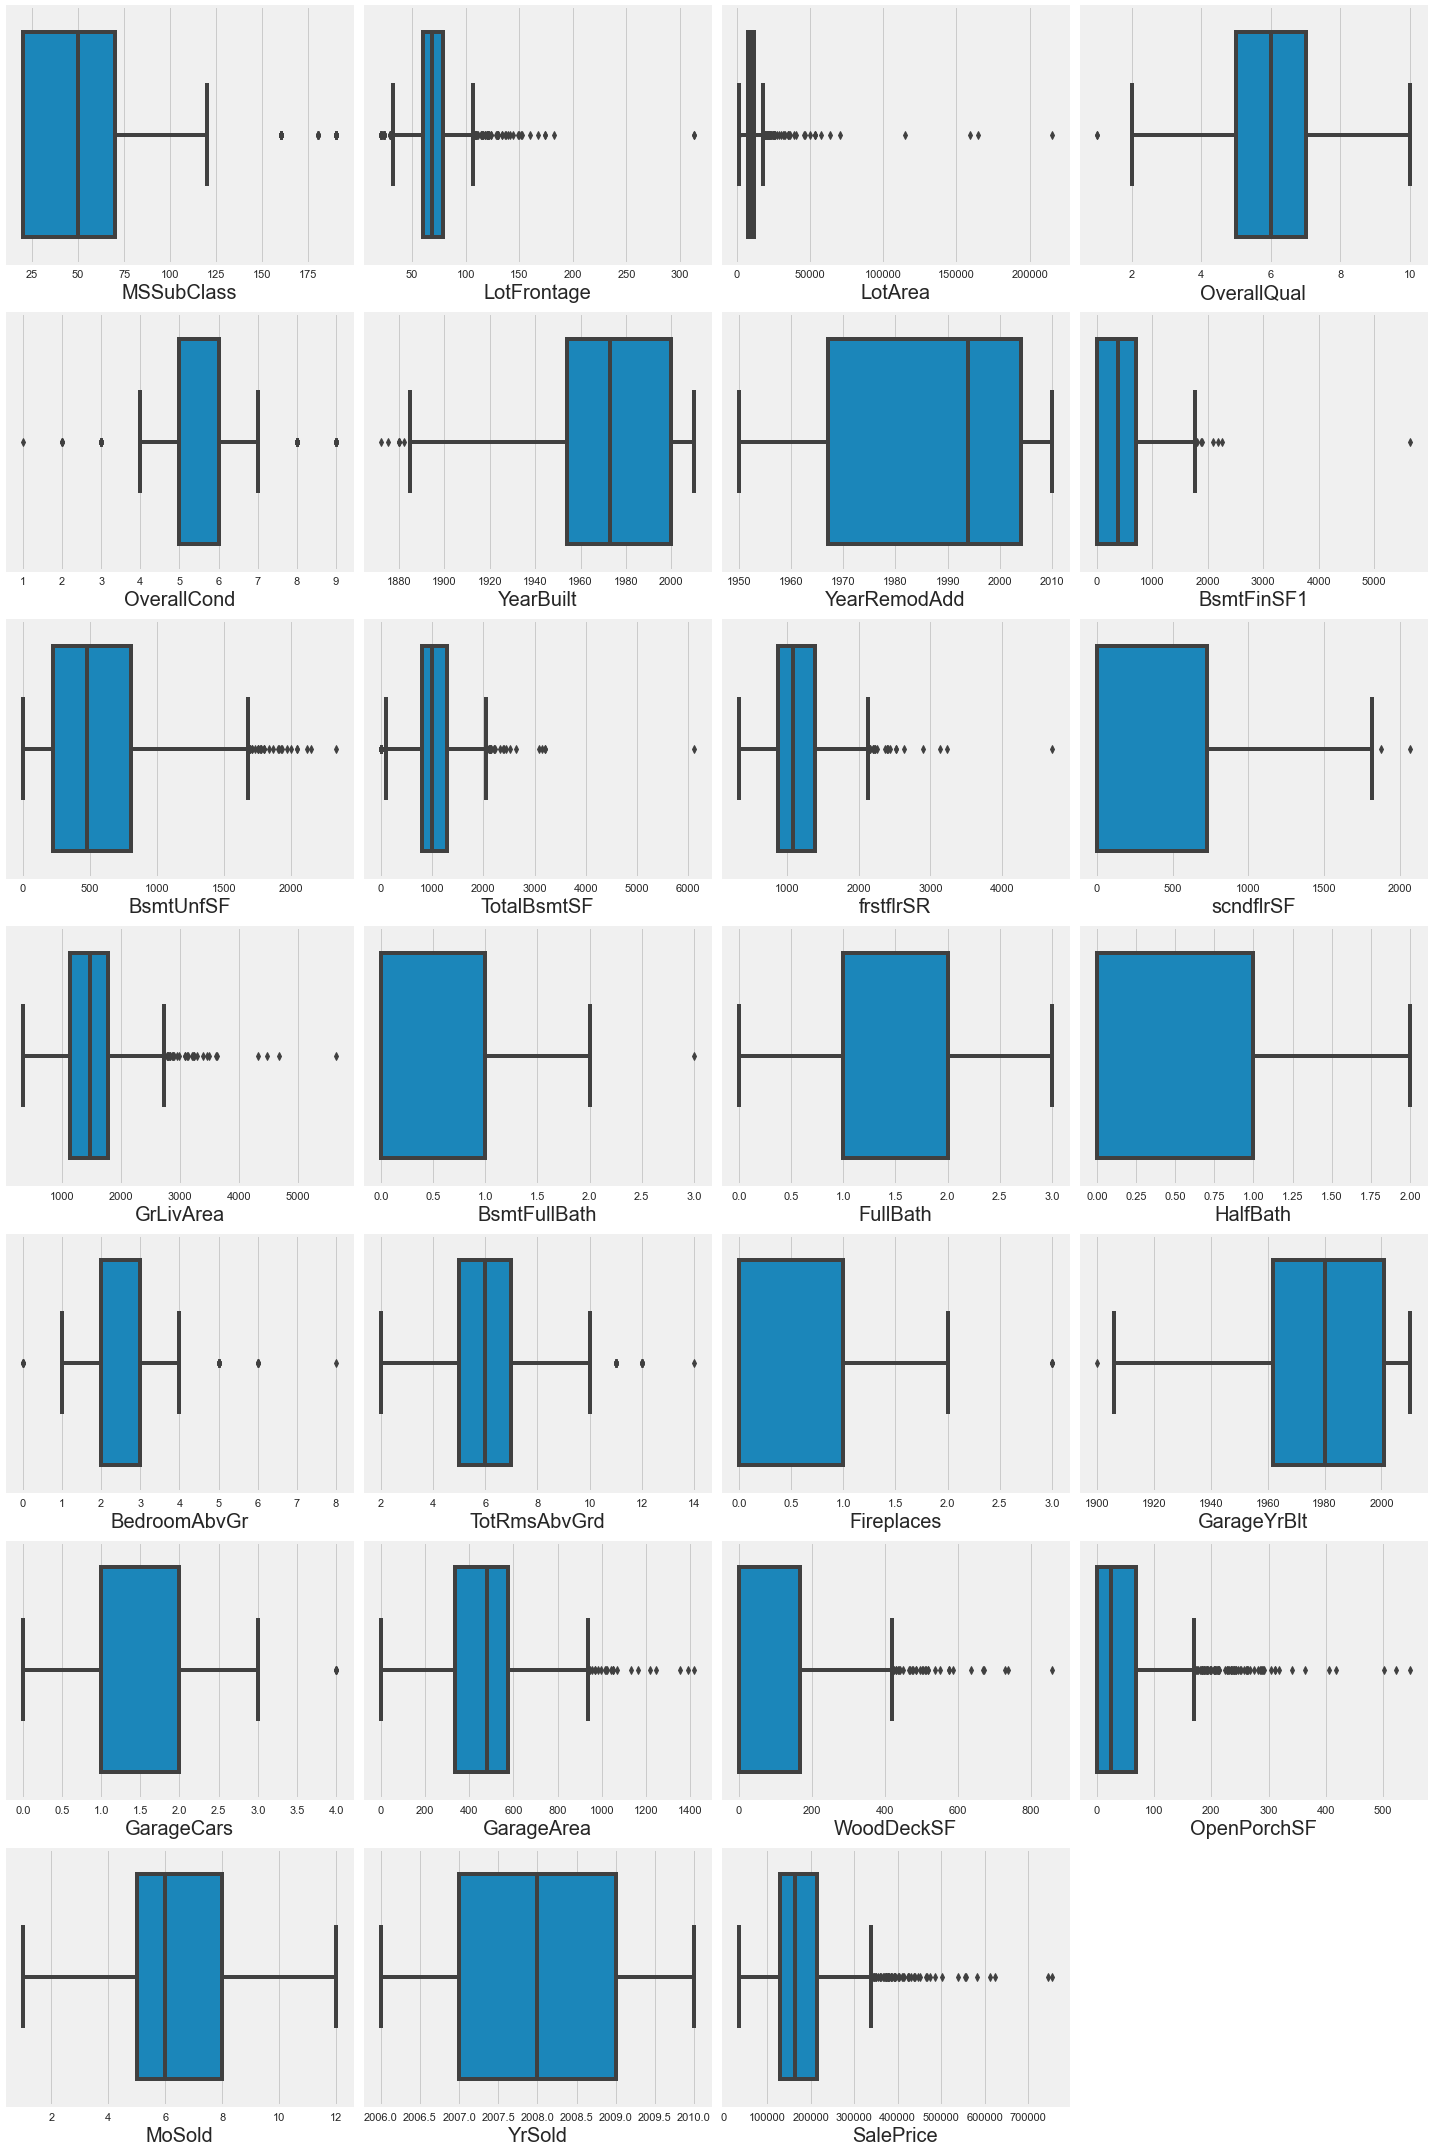

In [ ]:
plt.figure(figsize=(20,30),facecolor='white')

plotnumber=1

for column in data_num:
    if plotnumber<=28 :
        ax=plt.subplot(7,4,plotnumber) #row * column
        sns.boxplot(data_num[column])
        plt.xlabel(column,fontsize=20)
        
       
    plotnumber+=1
plt.tight_layout()

In [ ]:
data_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       'frstflrSR', 'scndflrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

#### MSSubClass

In [ ]:
from scipy import stats
IQR=stats.iqr(data2.MSSubClass,interpolation='midpoint')
Q1=data2.MSSubClass.quantile(0.25)
Q3=data2.MSSubClass.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['MSSubClass']>maxL,'MSSubClass']))
print(len(data2.loc[data2['MSSubClass']<minL,'MSSubClass']))

103
0


In [ ]:
data2.loc[data2['MSSubClass']>maxL,'MSSubClass']=np.median(data2.MSSubClass)
print(len(data2.loc[data2['MSSubClass']>maxL,'MSSubClass']))

0


**LotFrontage**

In [ ]:
IQR=stats.iqr(data2.LotFrontage,interpolation='midpoint')
Q1=data2.LotFrontage.quantile(0.25)
Q3=data2.LotFrontage.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['LotFrontage']>maxL,'LotFrontage']))
print(len(data2.loc[data2['LotFrontage']<minL,'LotFrontage']))

58
48


In [ ]:
data2.loc[data2['LotFrontage']>maxL,'LotFrontage']=np.median(data2.LotFrontage)
print(len(data2.loc[data2['LotFrontage']>maxL,'LotFrontage']))

0


In [ ]:
data2.loc[data2['LotFrontage']<minL,'LotFrontage']=np.median(data2.LotFrontage)
print(len(data2.loc[data2['LotFrontage']<minL,'LotFrontage']))

0


**LotArea**

In [ ]:
# lot arae
IQR=stats.iqr(data2.LotArea,interpolation='midpoint')
Q1=data2.LotArea.quantile(0.25)
Q3=data2.LotArea.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['LotArea']>maxL,'LotArea']))
print(len(data2.loc[data2['LotArea']<minL,'LotArea']))

67
1


In [ ]:
data2.loc[data2['LotArea']>maxL,'LotArea']=np.median(data2.LotArea)
print(len(data2.loc[data2['LotArea']>maxL,'LotArea']))

0


In [ ]:
data2.loc[data2['LotArea']<minL,'LotArea']=np.median(data2.LotArea)
print(len(data2.loc[data2['LotArea']<minL,'LotArea']))

0


#### OverallCond

In [ ]:
IQR=stats.iqr(data2.OverallCond,interpolation='midpoint')
Q1=data2.OverallCond.quantile(0.25)
Q3=data2.OverallCond.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['OverallCond']>maxL,'OverallCond']))
print(len(data2.loc[data2['OverallCond']<minL,'OverallCond']))

94
31


In [ ]:
data2.loc[data2['OverallCond']>maxL,'OverallCond']=np.median(data2.OverallCond)

In [ ]:
data2.loc[data2['OverallCond']<minL,'OverallCond']=np.median(data2.OverallCond)

In [ ]:
print(len(data2.loc[data2['OverallCond']>maxL,'OverallCond']))
print(len(data2.loc[data2['OverallCond']<minL,'OverallCond']))

0
0


#### OverallQual

In [ ]:
IQR=stats.iqr(data2.OverallQual,interpolation='midpoint')
Q1=data2.OverallQual.quantile(0.25)
Q3=data2.OverallQual.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['OverallQual']>maxL,'OverallQual']))
print(len(data2.loc[data2['OverallQual']<minL,'OverallQual']))

0
2


In [ ]:
data2.loc[data2['OverallQual']<minL,'OverallQual']=np.median(data2.OverallQual)
print(len(data2.loc[data2['OverallQual']<minL,'OverallQual']))

0


**BsmtFinSF1**

In [ ]:
IQR=stats.iqr(data2.BsmtFinSF1,interpolation='midpoint')
Q1=data2.BsmtFinSF1.quantile(0.25)
Q3=data2.BsmtFinSF1.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['BsmtFinSF1']>maxL,'BsmtFinSF1']))
print(len(data2.loc[data2['BsmtFinSF1']<minL,'BsmtFinSF1']))

7
0


In [ ]:
data2.loc[data2['BsmtFinSF1']>maxL,'BsmtFinSF1']=np.median(data2.BsmtFinSF1)
print(len(data2.loc[data2['BsmtFinSF1']>maxL,'BsmtFinSF1']))

0


**BsmtUnfSF**

In [ ]:
IQR=stats.iqr(data2.BsmtUnfSF,interpolation='midpoint')
Q1=data2.BsmtUnfSF.quantile(0.25)
Q3=data2.BsmtUnfSF.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['BsmtUnfSF']>maxL,'BsmtUnfSF']))
print(len(data2.loc[data2['BsmtUnfSF']<minL,'BsmtUnfSF']))

29
0


In [ ]:
data2.loc[data2['BsmtUnfSF']>maxL,'BsmtUnfSF']=np.median(data2.BsmtUnfSF)
print(len(data2.loc[data2['BsmtUnfSF']>maxL,'BsmtUnfSF']))

0


**TotalBsmtSF**

In [ ]:
IQR=stats.iqr(data2.TotalBsmtSF,interpolation='midpoint')
Q1=data2.TotalBsmtSF.quantile(0.25)
Q3=data2.TotalBsmtSF.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['TotalBsmtSF']>maxL,'TotalBsmtSF']))
print(len(data2.loc[data2['TotalBsmtSF']<minL,'TotalBsmtSF']))

24
37


In [ ]:
data2.loc[data2['TotalBsmtSF']>maxL,'TotalBsmtSF']=np.median(data2.TotalBsmtSF)
print(len(data2.loc[data2['TotalBsmtSF']>maxL,'TotalBsmtSF']))

0


In [ ]:
data2.loc[data2['TotalBsmtSF']<minL,'TotalBsmtSF']=np.median(data2.TotalBsmtSF)
print(len(data2.loc[data2['TotalBsmtSF']<minL,'TotalBsmtSF']))

0


**frstflrSR**

In [ ]:
IQR=stats.iqr(data2.frstflrSR,interpolation='midpoint')
Q1=data2.frstflrSR.quantile(0.25)
Q3=data2.frstflrSR.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['frstflrSR']>maxL,'frstflrSR']))
print(len(data2.loc[data2['frstflrSR']<minL,'frstflrSR']))

20
0


In [ ]:
data2.loc[data2['frstflrSR']>maxL,'frstflrSR']=np.median(data2.frstflrSR)
print(len(data2.loc[data2['frstflrSR']>maxL,'frstflrSR']))

0


**scndflrSF**

In [ ]:
IQR=stats.iqr(data2.scndflrSF,interpolation='midpoint') #scndflrSF
Q1=data2.scndflrSF.quantile(0.25)
Q3=data2.scndflrSF.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['scndflrSF']>maxL,'scndflrSF']))
print(len(data2.loc[data2['scndflrSF']<minL,'scndflrSF']))

2
0


In [ ]:
data2.loc[data2['scndflrSF']>maxL,'scndflrSF']=np.median(data2.scndflrSF)
print(len(data2.loc[data2['scndflrSF']>maxL,'scndflrSF']))

0


**GrLivArea**

In [ ]:
IQR=stats.iqr(data2.GrLivArea,interpolation='midpoint')
Q1=data2.GrLivArea.quantile(0.25)
Q3=data2.GrLivArea.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['GrLivArea']>maxL,'GrLivArea']))
print(len(data2.loc[data2['GrLivArea']<minL,'GrLivArea']))

31
0


In [ ]:
data2.loc[data2['GrLivArea']>maxL,'GrLivArea']=np.median(data2.GrLivArea)
print(len(data2.loc[data2['GrLivArea']>maxL,'GrLivArea']))

0


#### BsmtFullBath

In [ ]:
IQR=stats.iqr(data2.BsmtFullBath,interpolation='midpoint') #BsmtFullBath
Q1=data2.BsmtFullBath.quantile(0.25)
Q3=data2.BsmtFullBath.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['BsmtFullBath']>maxL,'BsmtFullBath']))
print(len(data2.loc[data2['BsmtFullBath']<minL,'BsmtFullBath']))

1
0


In [ ]:
data2.loc[data2['BsmtFullBath']>maxL,'BsmtFullBath']=np.median(data2.BsmtFullBath)
print(len(data2.loc[data2['BsmtFullBath']>maxL,'BsmtFullBath']))

0


#### BedroomAbvGr

In [ ]:
IQR=stats.iqr(data2.BedroomAbvGr,interpolation='midpoint') # BedroomAbvGr
Q1=data2.BedroomAbvGr.quantile(0.25)
Q3=data2.BedroomAbvGr.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['BedroomAbvGr']>maxL,'BedroomAbvGr']))
print(len(data2.loc[data2['BedroomAbvGr']<minL,'BedroomAbvGr']))

29
6


In [ ]:
data2.loc[data2['BedroomAbvGr']<minL,'BedroomAbvGr']=np.median(data2.BedroomAbvGr)

In [ ]:
data2.loc[data2['BedroomAbvGr']>maxL,'BedroomAbvGr']=np.median(data2.BedroomAbvGr)

In [ ]:
print(len(data2.loc[data2['BedroomAbvGr']>maxL,'BedroomAbvGr']))
print(len(data2.loc[data2['BedroomAbvGr']<minL,'BedroomAbvGr']))

0
0


#### TotRmsAbvGrd

In [ ]:
IQR=stats.iqr(data2.TotRmsAbvGrd,interpolation='midpoint')
Q1=data2.TotRmsAbvGrd.quantile(0.25)
Q3=data2.TotRmsAbvGrd.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['TotRmsAbvGrd']>maxL,'TotRmsAbvGrd']))
print(len(data2.loc[data2['TotRmsAbvGrd']<minL,'TotRmsAbvGrd']))

30
0


In [ ]:
data2.loc[data2['TotRmsAbvGrd']>maxL,'TotRmsAbvGrd']=np.median(data2.TotRmsAbvGrd)
print(len(data2.loc[data2['TotRmsAbvGrd']>maxL,'TotRmsAbvGrd']))

0


#### Fireplaces

In [ ]:
IQR=stats.iqr(data2.Fireplaces,interpolation='midpoint')
Q1=data2.Fireplaces.quantile(0.25)
Q3=data2.Fireplaces.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['Fireplaces']>maxL,'Fireplaces']))
print(len(data2.loc[data2['Fireplaces']<minL,'Fireplaces']))

5
0


In [ ]:
data2.loc[data2['Fireplaces']>maxL,'Fireplaces']=np.mean(data2.Fireplaces)
print(len(data2.loc[data2['Fireplaces']>maxL,'Fireplaces']))

0


#### GarageCars

In [ ]:
IQR=stats.iqr(data2.GarageCars,interpolation='midpoint')
Q1=data2.GarageCars.quantile(0.25)
Q3=data2.GarageCars.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['GarageCars']>maxL,'GarageCars']))
print(len(data2.loc[data2['GarageCars']<minL,'GarageCars']))

5
0


In [ ]:
data2.loc[data2['GarageCars']>maxL,'GarageCars']=np.median(data2.GarageCars)
print(len(data2.loc[data2['GarageCars']>maxL,'GarageCars']))

0


**GarageYrBlt**

**GarageArea**

In [ ]:
IQR=stats.iqr(data2.GarageArea,interpolation='midpoint')
Q1=data2.GarageArea.quantile(0.25)
Q3=data2.GarageArea.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['GarageArea']>maxL,'GarageArea']))
print(len(data2.loc[data2['GarageArea']<minL,'GarageArea']))

21
0


In [ ]:
data2.loc[data2['GarageArea']>maxL,'GarageArea']=np.median(data2.GarageArea)
print(len(data2.loc[data2['GarageArea']>maxL,'GarageArea']))

0


**WoodDeckSF**

In [ ]:
IQR=stats.iqr(data2.WoodDeckSF,interpolation='midpoint')
Q1=data2.WoodDeckSF.quantile(0.25)
Q3=data2.WoodDeckSF.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['WoodDeckSF']>maxL,'WoodDeckSF']))
print(len(data2.loc[data2['WoodDeckSF']<minL,'WoodDeckSF']))

32
0


In [ ]:
data2.loc[data2['WoodDeckSF']>maxL,'WoodDeckSF']=np.median(data2.WoodDeckSF)
print(len(data2.loc[data2['WoodDeckSF']>maxL,'WoodDeckSF']))

0


**OpenPorchSF**

In [ ]:
IQR=stats.iqr(data2.OpenPorchSF,interpolation='midpoint')
Q1=data2.OpenPorchSF.quantile(0.25)
Q3=data2.OpenPorchSF.quantile(0.75)
maxL=Q3+1.5*IQR
minL=Q1-1.5*IQR
print(len(data2.loc[data2['OpenPorchSF']>maxL,'OpenPorchSF']))
print(len(data2.loc[data2['OpenPorchSF']<minL,'OpenPorchSF']))

77
0


In [ ]:
data2.loc[data2['OpenPorchSF']>maxL,'OpenPorchSF']=np.median(data2.OpenPorchSF)
print(len(data2.loc[data2['OpenPorchSF']>maxL,'OpenPorchSF']))

0


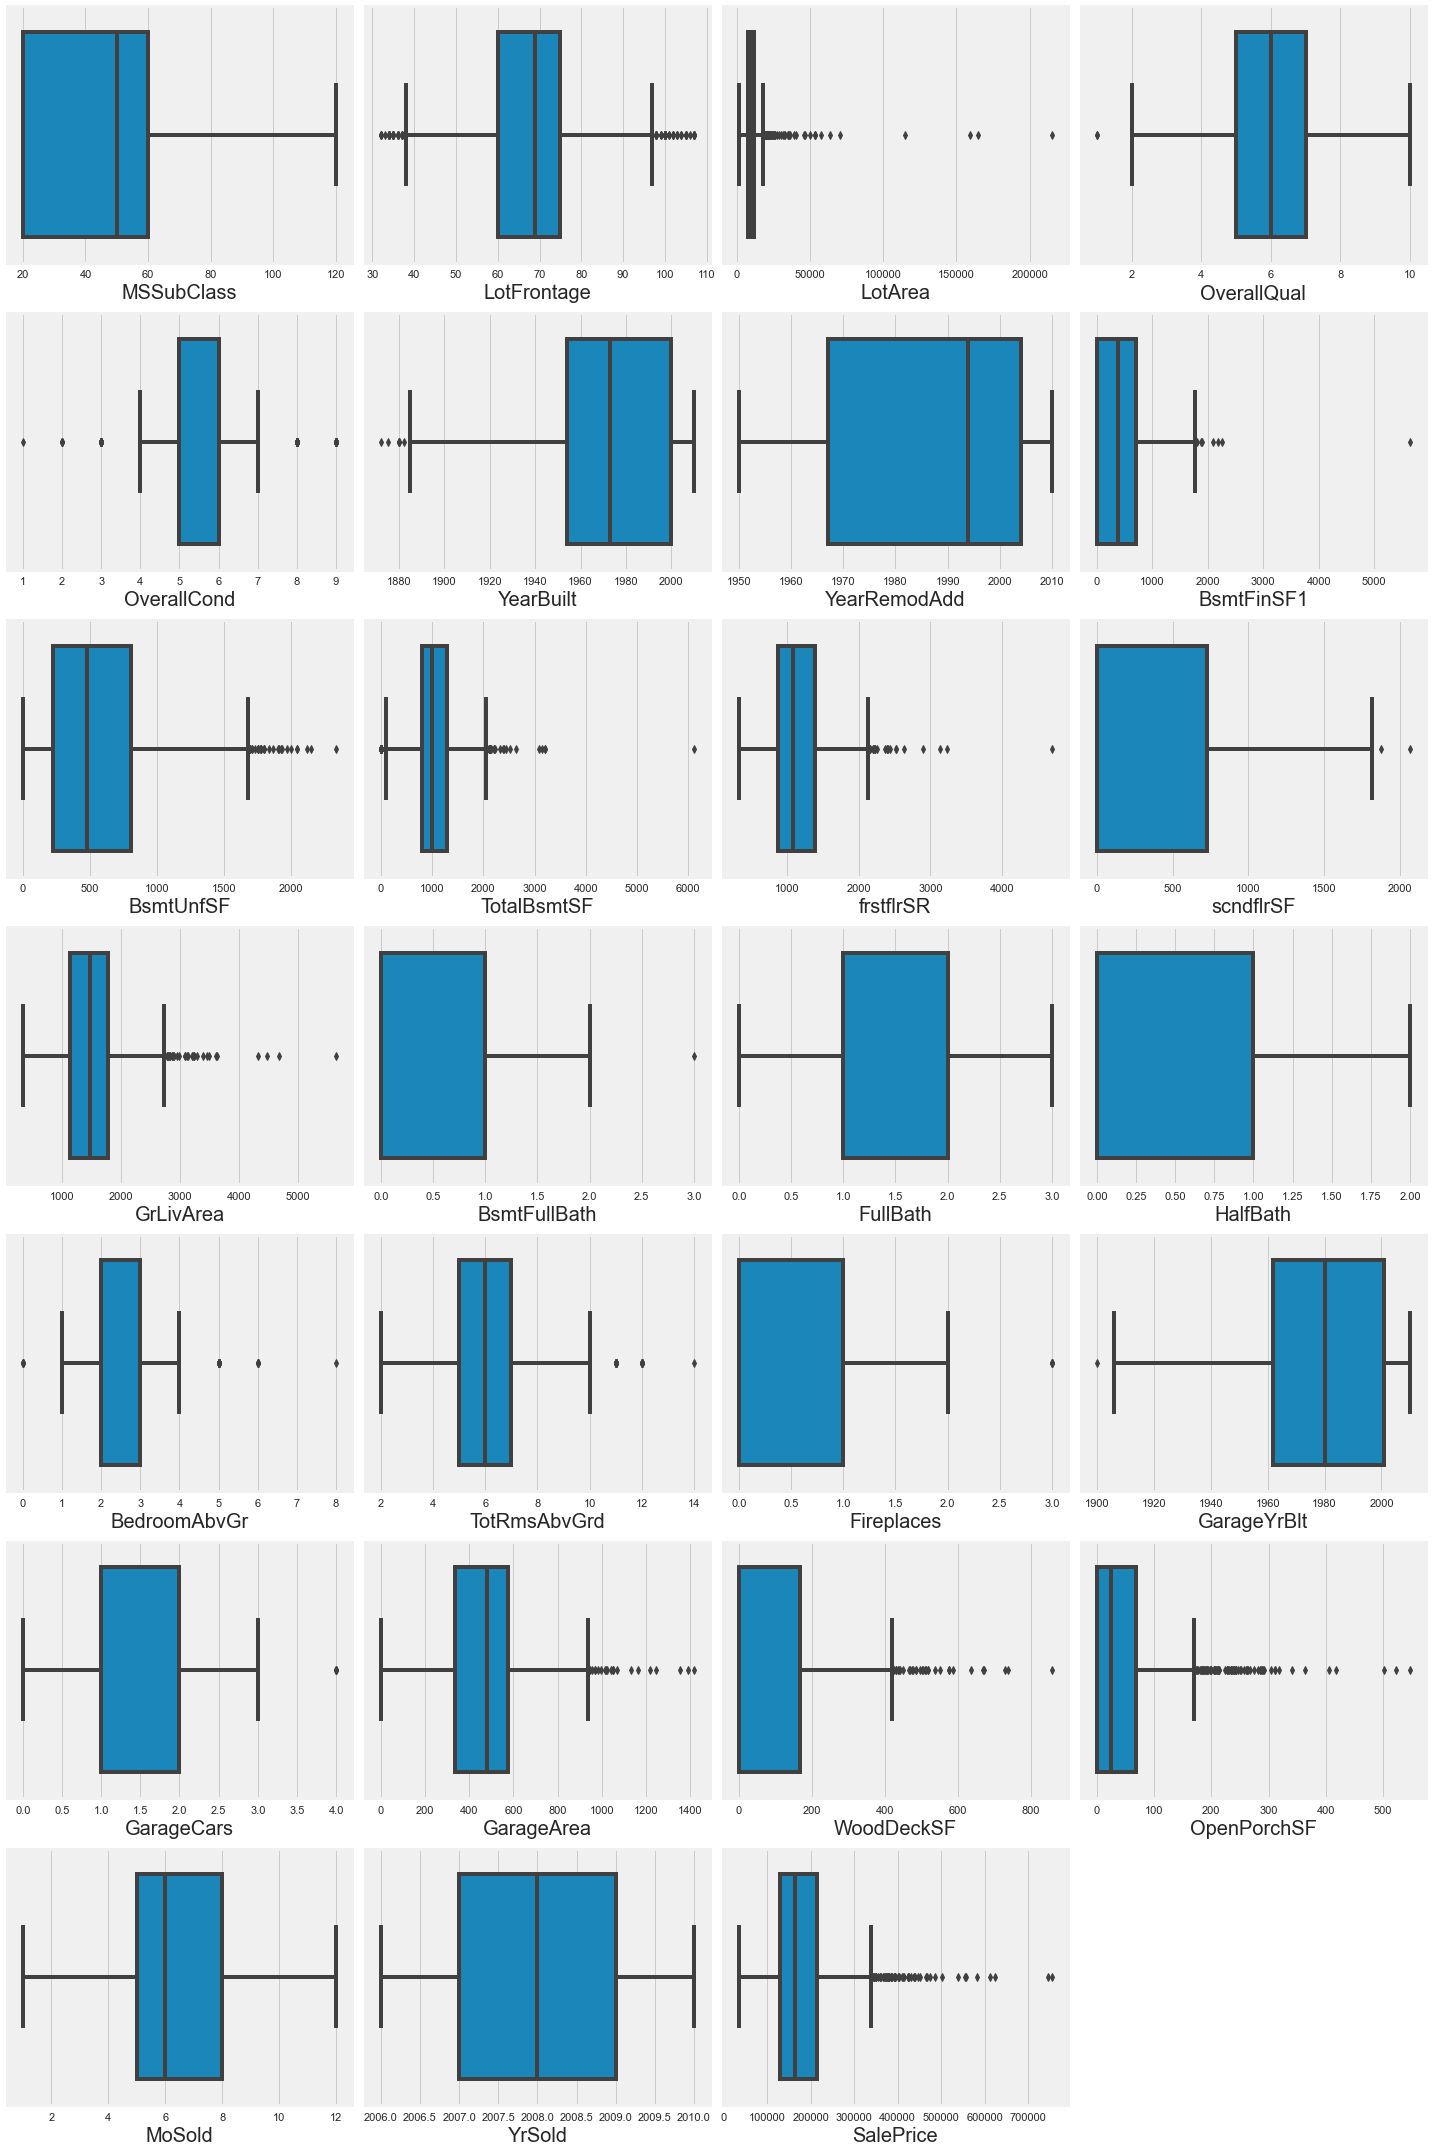

In [ ]:
plt.figure(figsize=(20,30),facecolor='white')

plotnumber=1

for column in data_num:
    if plotnumber<=28 :
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(data_num[column])
        plt.xlabel(column,fontsize=20)
        
       
    plotnumber+=1
plt.tight_layout()

In [ ]:
data2.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0   8450.0      Reg    Inside      CollgCr   
1          20       RL         80.0   9600.0      Reg       FR2      Veenker   
2          60       RL         68.0  11250.0      IR1    Inside      CollgCr   
3          70       RL         60.0   9550.0      IR1    Corner      Crawfor   
4          60       RL         84.0  14260.0      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            5       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual  \
0  CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   
1  CompShg     MetalSd     MetalSd        TA        TA     CBlock       Gd   
2  CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   
3  CompShg     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA   
4  CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ       706.0      150.0        856.0        Ex   
1           Gd          ALQ       978.0      284.0       1262.0        Ex   
2           Mn          GLQ       486.0      434.0        920.0        Ex   
3           No          ALQ       216.0      540.0        756.0        Gd   
4           Av          GLQ       655.0      490.0       1145.0        Ex   

  CentralAir  frstflrSR  scndflrSF  GrLivArea  BsmtFullBath  FullBath  \
0          Y        856        854       1710             1         2   
1          Y       1262          0       1262             0         2   
2          Y        920        866       1786             1         2   
3          Y        961        756       1717             1         1   
4          Y       1145       1053       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  \
0         1             3          Gd             8         0.0     Attchd   
1         0             3          TA             6         1.0     Attchd   
2         1             3          Gd             6         1.0     Attchd   
3         0             3          Gd             7         1.0     Detchd   
4         1             4          Gd             9         1.0     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000

### Converting categorical to numerical

In [ ]:
data2.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
data2.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [ ]:
data2.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [ ]:
data2.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

In [ ]:
data2.ExterCond.value_counts() 

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [ ]:
data2.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [ ]:
data2.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [ ]:
data2.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

From above observationthe below feature list contains more 65% of single(constant) value so drop these featutes
['MSZoning','LotConfig','RoofStyle','RoofMatl','ExterCond','BsmtExposure','CentralAir','GarageType']

In [ ]:
data2.drop(['MSZoning','LotConfig','RoofStyle','RoofMatl','ExterCond','BsmtExposure','CentralAir','GarageType'],axis=1,inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1460 non-null   float64
 2   LotArea       1460 non-null   float64
 3   LotShape      1460 non-null   object 
 4   Neighborhood  1460 non-null   object 
 5   HouseStyle    1460 non-null   object 
 6   OverallQual   1460 non-null   int64  
 7   OverallCond   1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  Exterior1st   1460 non-null   object 
 11  Exterior2nd   1460 non-null   object 
 12  ExterQual     1460 non-null   object 
 13  Foundation    1460 non-null   object 
 14  BsmtQual      1460 non-null   object 
 15  BsmtFinType1  1460 non-null   object 
 16  BsmtFinSF1    1460 non-null   float64
 17  BsmtUnfSF     1460 non-null   float64
 18  TotalBsmtSF   1460 non-null 

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [ ]:
#data2.MSZoning=lc.fit_transform(data2.MSZoning)
data2.LotShape=lc.fit_transform(data2.LotShape)
#data2.LotConfig=lc.fit_transform(data2.LotConfig)
data2.Neighborhood=lc.fit_transform(data2.Neighborhood)
data2.HouseStyle=lc.fit_transform(data2.HouseStyle)
#data2.RoofStyle=lc.fit_transform(data2.RoofStyle)
#data2.RoofMatl=lc.fit_transform(data2.RoofMatl)
data2.Exterior1st=lc.fit_transform(data2.Exterior1st)
data2.Exterior2nd=lc.fit_transform(data2.Exterior2nd)
data2.ExterQual=lc.fit_transform(data2.ExterQual)

#data2.ExterCond=lc.fit_transform(data2.ExterCond)
data2.Foundation=lc.fit_transform(data2.Foundation)
data2.BsmtQual=lc.fit_transform(data2.BsmtQual)
data2.BsmtFinType1=lc.fit_transform(data2.BsmtFinType1)

#data2.BsmtExposure=lc.fit_transform(data2.BsmtExposure)
data2.HeatingQC=lc.fit_transform(data2.HeatingQC)

#data2.CentralAir=lc.fit_transform(data2.CentralAir)
data2.KitchenQual=lc.fit_transform(data2.KitchenQual)
#data2.GarageType=lc.fit_transform(data2.GarageType)
data2.GarageFinish=lc.fit_transform(data2.GarageFinish)


In [ ]:
data2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'frstflrSR', 'scndflrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
3#Data Normalization by MinMAx scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=data2.drop('SalePrice',axis=1)

data1=sc.fit_transform(df)

In [ ]:
data2=pd.DataFrame(data1,columns=['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'frstflrSR', 'scndflrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold'])

In [ ]:
final_data=pd.concat([data2,data['SalePrice']],axis=1)
final_data

MSSubClass  LotFrontage   LotArea  LotShape  Neighborhood  HouseStyle  \
0            0.4     0.440000  0.430592       1.0      0.208333    0.714286   
1            0.0     0.640000  0.501606       1.0      1.000000    0.285714   
2            0.4     0.480000  0.603495       0.0      0.208333    0.714286   
3            0.5     0.373333  0.498518       0.0      0.250000    0.714286   
4            0.4     0.693333  0.789366       0.0      0.625000    0.714286   
...          ...          ...       ...       ...           ...         ...   
1455         0.4     0.400000  0.397678       1.0      0.333333    0.714286   
1456         0.0     0.706667  0.722366       1.0      0.583333    0.285714   
1457         0.5     0.453333  0.467148       1.0      0.250000    0.714286   
1458         0.0     0.480000  0.508830       1.0      0.500000    0.285714   
1459         0.0     0.573333  0.522416       1.0      0.291667    0.285714   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
0           0.625     0.333333   0.949275      0.883333     0.857143   
1           0.500     0.333333   0.753623      0.433333     0.571429   
2           0.625     0.333333   0.934783      0.866667     0.857143   
3           0.625     0.333333   0.311594      0.333333     0.928571   
4           0.750     0.333333   0.927536      0.833333     0.857143   
...           ...          ...        ...           ...          ...   
1455        0.500     0.333333   0.920290      0.833333     0.857143   
1456        0.500     0.666667   0.768116      0.633333     0.642857   
1457        0.625     0.333333   0.500000      0.933333     0.357143   
1458        0.375     0.666667   0.565217      0.766667     0.571429   
1459        0.375     0.666667   0.673913      0.250000     0.428571   

      Exterior2nd  ExterQual  Foundation  BsmtQual  BsmtFinType1  BsmtFinSF1  \
0        0.866667   0.666667         0.4  0.666667           0.4    0.399547   
1        0.533333   1.000000         0.2  0.666667           0.0    0.553480   
2        0.866667   0.666667         0.4  0.666667           0.4    0.275042   
3        1.000000   1.000000         0.0  1.000000           0.0    0.122241   
4        0.866667   0.666667         0.4  0.666667           0.4    0.370685   
...           ...        ...         ...       ...           ...         ...   
1455     0.866667   1.000000         0.4  0.666667           1.0    0.000000   
1456     0.666667   1.000000         0.2  0.666667           0.0    0.447085   
1457     0.333333   0.000000         0.8  1.000000           0.4    0.155631   
1458     0.533333   1.000000         0.2  1.000000           0.4    0.027731   
1459     0.400000   0.666667         0.2  1.000000           0.2    0.469723   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  frstflrSR  scndflrSF  GrLivArea  \
0      0.089286     0.386914        0.0   0.289678   0.469747   0.574290   
1      0.169048     0.596084        0.0   0.514983   0.000000   0.387312   
2      0.258333     0.419887        0.0   0.325194   0.476348   0.606010   
3      0.321429     0.335394        0.5   0.347947   0.415842   0.577212   
4      0.291667     0.535806        0.0   0.450055   0.579208   0.777963   
...         ...          ...        ...        ...        ...        ...   
1455   0.567262     0.436888        0.0   0.343507   0.381738   0.547997   
1456   0.350595     0.740340        1.0   0.965039   0.000000   0.725793   
1457   0.522024     0.539413        0.0   0.473918   0.633663   0.837229   
1458   0.000000     0.501288        0.5   0.412875   0.000000   0.310518   
1459   0.080952     0.592993        0.5   0.511654   0.000000   0.384808   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0              0.5  0.666667       0.5      0.666667     0.666667   
1              0.0  0.666667       0.0      0.666667     1.000000   
2              0.5  0.666667       0.5      0.666667     0.666667   
3              0.5  0.333333       0.0    

MSSubClass  LotFrontage  LotArea  LotShape  Neighborhood  HouseStyle  \
0             60         65.0   8450.0         3             5           5   
1             20         80.0   9600.0         3            24           2   
2             60         68.0  11250.0         0             5           5   
3             70         60.0   9550.0         0             6           5   
4             60         84.0  14260.0         0            15           5   
...          ...          ...      ...       ...           ...         ...   
1455          60         62.0   7917.0         3             8           5   
1456          20         85.0  13175.0         3            14           2   
1457          70         66.0   9042.0         3             6           5   
1458          20         68.0   9717.0         3            12           2   
1459          20         75.0   9937.0         3             7           2   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
0               7            5       2003          2003           12   
1               6            5       1976          1976            8   
2               7            5       2001          2002           12   
3               7            5       1915          1970           13   
4               8            5       2000          2000           12   
...           ...          ...        ...           ...          ...   
1455            6            5       1999          2000           12   
1456            6            6       1978          1988            9   
1457            7            5       1941          2006            5   
1458            5            6       1950          1996            8   
1459            5            6       1965          1965            6   

      Exterior2nd  ExterQual  Foundation  BsmtQual  BsmtFinType1  BsmtFinSF1  \
0              13          2           2         2             2       706.0   
1               8          3           1         2             0       978.0   
2              13          2           2         2             2       486.0   
3              15          3           0         3             0       216.0   
4              13          2           2         2             2       655.0   
...           ...        ...         ...       ...           ...         ...   
1455           13          3           2         2             5         0.0   
1456           10          3           1         2             0       790.0   
1457            5          0           4         3             2       275.0   
1458            8          3           1         3             2        49.0   
1459            6          2           1         3             1       830.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  frstflrSR  scndflrSF  GrLivArea  \
0         150.0        856.0          0        856        854       1710   
1         284.0       1262.0          0       1262          0       1262   
2         434.0        920.0          0        920        866       1786   
3         540.0        756.0          2        961        756       1717   
4         490.0       1145.0          0       1145       1053       2198   
...         ...          ...        ...        ...        ...        ...   
1455      953.0        953.0          0        953        694       1647   
1456      589.0       1542.0          4       2073          0       2073   
1457      877.0       1152.0          0       1188       1152       2340   
1458        0.0       1078.0          2       1078          0       1078   
1459      136.0       1256.0          2       1256          0       1256   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0                1         2         1             3            2   
1                0         2         0             3            3   
2                1         2         1             3            2   
3                1         1         0             3  

In [ ]:
col_corr=final_data[['LotArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','frstflrSR','scndflrSF','GrLivArea',
               'GarageArea','WoodDeckSF']]

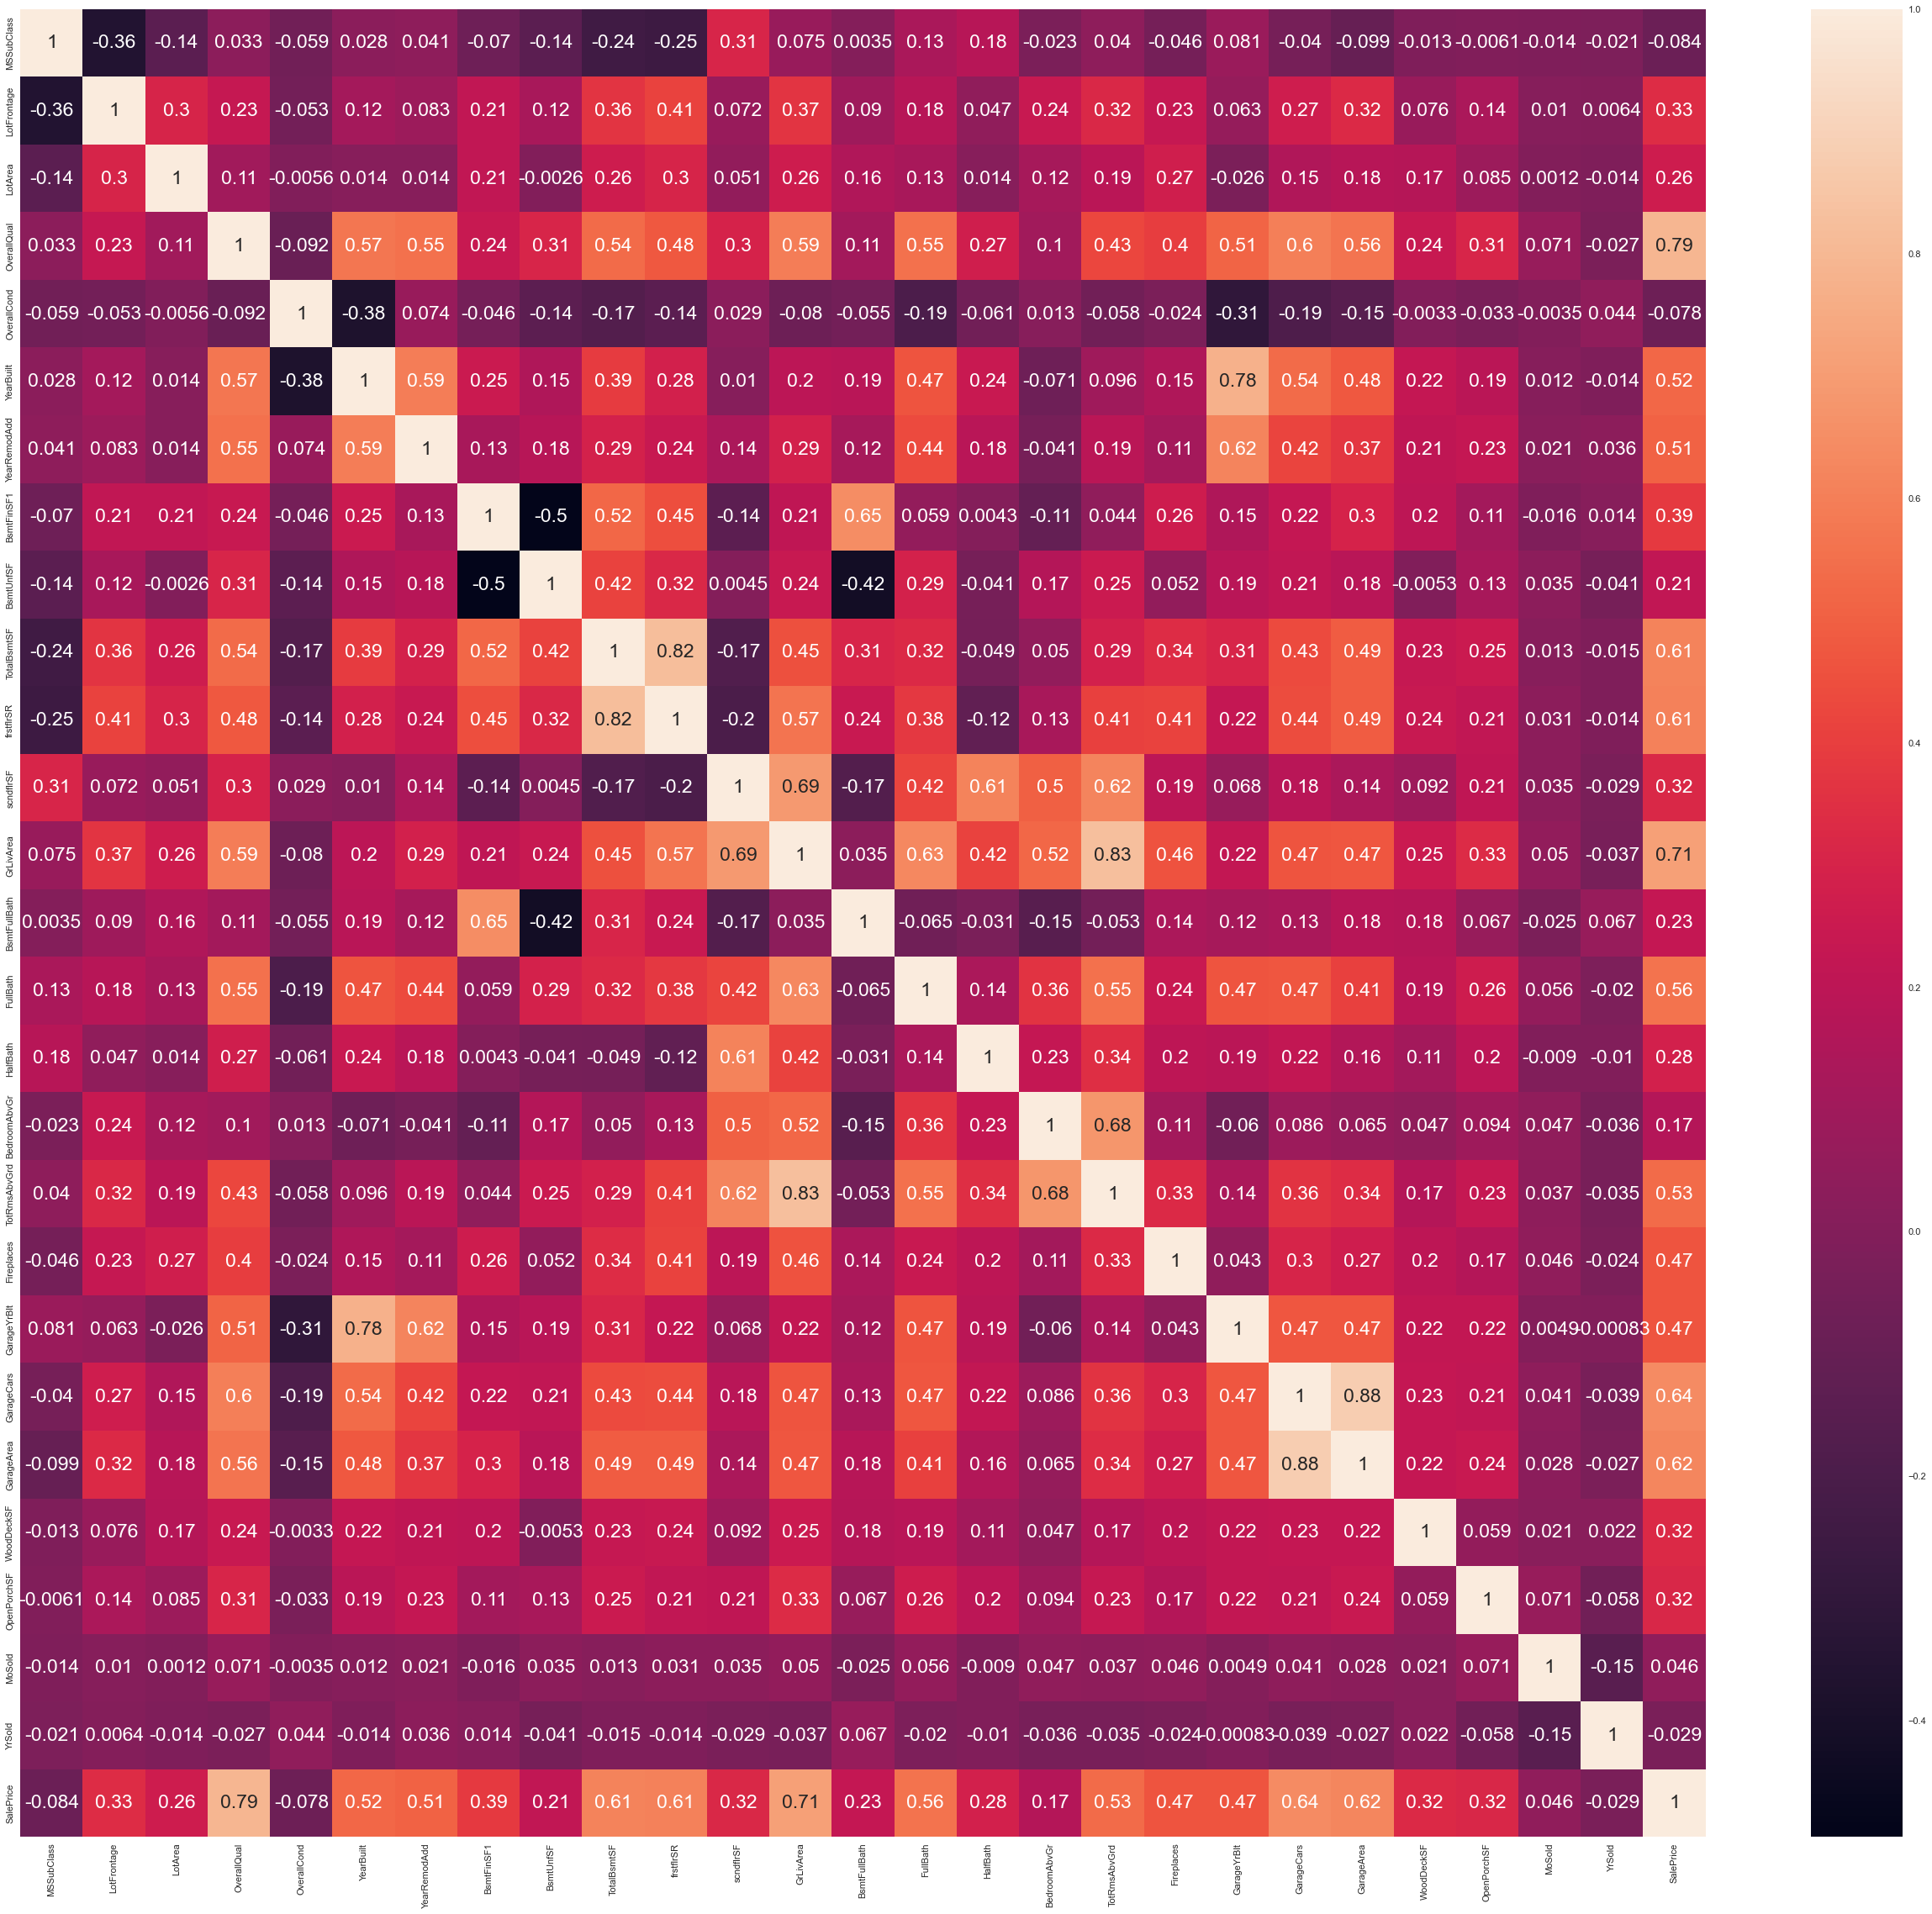

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(40,40), facecolor='white')
col_corr = data.corr()
  
sns.heatmap(col_corr,annot=True, annot_kws={"size":23})
plt.show()
plt.tight_layout()

## Model Creation

### Linear Regression

In [ ]:
final_data.head()

MSSubClass  LotFrontage   LotArea  LotShape  Neighborhood  HouseStyle  \
0         0.4     0.440000  0.430592       1.0      0.208333    0.714286   
1         0.0     0.640000  0.501606       1.0      1.000000    0.285714   
2         0.4     0.480000  0.603495       0.0      0.208333    0.714286   
3         0.5     0.373333  0.498518       0.0      0.250000    0.714286   
4         0.4     0.693333  0.789366       0.0      0.625000    0.714286   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
0        0.625     0.333333   0.949275      0.883333     0.857143   
1        0.500     0.333333   0.753623      0.433333     0.571429   
2        0.625     0.333333   0.934783      0.866667     0.857143   
3        0.625     0.333333   0.311594      0.333333     0.928571   
4        0.750     0.333333   0.927536      0.833333     0.857143   

   Exterior2nd  ExterQual  Foundation  BsmtQual  BsmtFinType1  BsmtFinSF1  \
0     0.866667   0.666667         0.4  0.666667           0.4    0.399547   
1     0.533333   1.000000         0.2  0.666667           0.0    0.553480   
2     0.866667   0.666667         0.4  0.666667           0.4    0.275042   
3     1.000000   1.000000         0.0  1.000000           0.0    0.122241   
4     0.866667   0.666667         0.4  0.666667           0.4    0.370685   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  frstflrSR  scndflrSF  GrLivArea  \
0   0.089286     0.386914        0.0   0.289678   0.469747   0.574290   
1   0.169048     0.596084        0.0   0.514983   0.000000   0.387312   
2   0.258333     0.419887        0.0   0.325194   0.476348   0.606010   
3   0.321429     0.335394        0.5   0.347947   0.415842   0.577212   
4   0.291667     0.535806        0.0   0.450055   0.579208   0.777963   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  \
0           0.5  0.666667       0.5      0.666667     0.666667         0.750   
1           0.0  0.666667       0.0      0.666667     1.000000         0.500   
2           0.5  0.666667       0.5      0.666667     0.666667         0.500   
3           0.5  0.333333       0.0      0.666667     0.666667         0.625   
4           0.5  0.666667       0.5      1.000000     0.666667         0.875   

   Fireplaces  GarageYrBlt  GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0         0.0     0.936364           0.5    0.666667    0.585470    0.000000   
1         0.5     0.690909           0.5    0.666667    0.491453    0.712919   
2         0.5     0.918182           0.5    0.666667    0.649573    0.000000   
3         0.5     0.890909           1.0    1.000000    0.685897    0.000000   
4         0.5     0.909091           0.5    1.000000    0.893162    0.459330   

   OpenPorchSF    MoSold  YrSold  SalePrice  
0     0.358824  0.090909    0.50     208500  
1     0.000000  0.363636    0.25     181500  
2     0.247059  0.727273    0.50     223500  
3     0.205882  0.090909    0.00     140000  
4     0.494118  1.000000    0.50     250000

In [ ]:
X = final_data.drop('SalePrice', axis = 1)
y = final_data['SalePrice']

In [ ]:
X

MSSubClass  LotFrontage   LotArea  LotShape  Neighborhood  HouseStyle  \
0            0.4     0.440000  0.430592       1.0      0.208333    0.714286   
1            0.0     0.640000  0.501606       1.0      1.000000    0.285714   
2            0.4     0.480000  0.603495       0.0      0.208333    0.714286   
3            0.5     0.373333  0.498518       0.0      0.250000    0.714286   
4            0.4     0.693333  0.789366       0.0      0.625000    0.714286   
...          ...          ...       ...       ...           ...         ...   
1455         0.4     0.400000  0.397678       1.0      0.333333    0.714286   
1456         0.0     0.706667  0.722366       1.0      0.583333    0.285714   
1457         0.5     0.453333  0.467148       1.0      0.250000    0.714286   
1458         0.0     0.480000  0.508830       1.0      0.500000    0.285714   
1459         0.0     0.573333  0.522416       1.0      0.291667    0.285714   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
0           0.625     0.333333   0.949275      0.883333     0.857143   
1           0.500     0.333333   0.753623      0.433333     0.571429   
2           0.625     0.333333   0.934783      0.866667     0.857143   
3           0.625     0.333333   0.311594      0.333333     0.928571   
4           0.750     0.333333   0.927536      0.833333     0.857143   
...           ...          ...        ...           ...          ...   
1455        0.500     0.333333   0.920290      0.833333     0.857143   
1456        0.500     0.666667   0.768116      0.633333     0.642857   
1457        0.625     0.333333   0.500000      0.933333     0.357143   
1458        0.375     0.666667   0.565217      0.766667     0.571429   
1459        0.375     0.666667   0.673913      0.250000     0.428571   

      Exterior2nd  ExterQual  Foundation  BsmtQual  BsmtFinType1  BsmtFinSF1  \
0        0.866667   0.666667         0.4  0.666667           0.4    0.399547   
1        0.533333   1.000000         0.2  0.666667           0.0    0.553480   
2        0.866667   0.666667         0.4  0.666667           0.4    0.275042   
3        1.000000   1.000000         0.0  1.000000           0.0    0.122241   
4        0.866667   0.666667         0.4  0.666667           0.4    0.370685   
...           ...        ...         ...       ...           ...         ...   
1455     0.866667   1.000000         0.4  0.666667           1.0    0.000000   
1456     0.666667   1.000000         0.2  0.666667           0.0    0.447085   
1457     0.333333   0.000000         0.8  1.000000           0.4    0.155631   
1458     0.533333   1.000000         0.2  1.000000           0.4    0.027731   
1459     0.400000   0.666667         0.2  1.000000           0.2    0.469723   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  frstflrSR  scndflrSF  GrLivArea  \
0      0.089286     0.386914        0.0   0.289678   0.469747   0.574290   
1      0.169048     0.596084        0.0   0.514983   0.000000   0.387312   
2      0.258333     0.419887        0.0   0.325194   0.476348   0.606010   
3      0.321429     0.335394        0.5   0.347947   0.415842   0.577212   
4      0.291667     0.535806        0.0   0.450055   0.579208   0.777963   
...         ...          ...        ...        ...        ...        ...   
1455   0.567262     0.436888        0.0   0.343507   0.381738   0.547997   
1456   0.350595     0.740340        1.0   0.965039   0.000000   0.725793   
1457   0.522024     0.539413        0.0   0.473918   0.633663   0.837229   
1458   0.000000     0.501288        0.5   0.412875   0.000000   0.310518   
1459   0.080952     0.592993        0.5   0.511654   0.000000   0.384808   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
0              0.5  0.666667       0.5      0.666667     0.666667   
1              0.0  0.666667       0.0      0.666667     1.000000   
2              0.5  0.666667       0.5      0.666667     0.666667   
3              0.5  0.333333       0.0    

In [ ]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=3)

In [ ]:
X_train

MSSubClass  LotFrontage   LotArea  LotShape  Neighborhood  HouseStyle  \
955         0.70     0.666667  0.349450       0.0      0.250000    0.714286   
674         0.00     0.640000  0.476905       1.0      0.500000    0.285714   
904         0.00     0.493333  0.289984       0.0      0.791667    0.285714   
746         0.40     0.493333  0.451896       0.0      0.333333    0.714286   
477         0.40     0.973333  0.754353       1.0      0.666667    0.714286   
...          ...          ...       ...       ...           ...         ...   
789         0.40     0.493333  0.662468       0.0      0.166667    0.714286   
256         0.40     0.426667  0.451649       0.0      0.875000    0.714286   
968         0.30     0.240000  0.274670       1.0      0.708333    0.000000   
952         0.65     0.373333  0.353402       1.0      0.208333    0.857143   
1273        0.60     0.493333  0.619674       0.0      0.291667    1.000000   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  \
955         0.500     0.666667   0.536232      0.000000     0.571429   
674         0.500     0.666667   0.673913      0.250000     0.428571   
904         0.375     0.666667   0.688406      0.283333     0.428571   
746         0.625     0.333333   0.927536      0.833333     0.857143   
477         0.875     0.333333   0.971014      0.933333     0.857143   
...           ...          ...        ...           ...          ...   
789         0.500     0.333333   0.681159      0.950000     0.428571   
256         0.500     0.333333   0.949275      0.883333     0.857143   
968         0.125     0.666667   0.275362      0.000000     0.857143   
952         0.375     0.333333   0.724638      0.883333     1.000000   
1273        0.500     1.000000   0.630435      0.933333     0.642857   

      Exterior2nd  ExterQual  Foundation  BsmtQual  BsmtFinType1  BsmtFinSF1  \
955      0.533333   1.000000         0.2  0.666667           0.8    0.273911   
674      0.400000   1.000000         0.2  1.000000           0.8    0.504810   
904      0.933333   1.000000         0.2  1.000000           0.4    0.338993   
746      0.866667   0.666667         0.4  0.666667           0.4    0.169779   
477      0.866667   0.000000         0.4  0.666667           1.0    0.000000   
...           ...        ...         ...       ...           ...         ...   
789      0.400000   1.000000         0.2  1.000000           0.6    0.321449   
256      0.866667   0.666667         0.4  0.666667           0.8    0.284663   
968      0.866667   1.000000         0.0  1.000000           1.0    0.000000   
952      0.400000   1.000000         0.2  0.666667           0.4    0.373514   
1273     0.666667   1.000000         0.2  1.000000           0.0    0.406904   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  frstflrSR  scndflrSF  GrLivArea  \
955    0.294643     0.450283       1.00   0.357936   0.538504   0.677796   
674    0.145238     0.531170       1.00   0.445061   0.000000   0.334725   
904    0.164881     0.397218       1.00   0.315205   0.000000   0.237062   
746    0.388095     0.436373       0.00   0.358491   0.701870   0.802170   
477    0.284226     0.456723       0.00   0.962819   0.315732   0.963689   
...         ...          ...        ...        ...        ...        ...   
789    0.157143     0.374549       0.50   0.356271   0.611111   0.731636   
256    0.214881     0.391036       0.00   0.294118   0.475248   0.581803   
968    0.357143     0.255023       0.25   0.147614   0.202420   0.264608   
952    0.064286     0.341577       0.50   0.240844   0.000000   0.181135   
1273   0.178571     0.470891       0.50   0.567703   0.000000   0.426962   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenQual  \
955            0.0  0.666667       0.0      1.000000     1.000000   
674            0.5  0.333333       0.0      0.666667     1.000000   
904            0.0  0.333333       0.0      0.666667     1.000000   
746            0.0  0.666667       0.5    

In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() #object creation
LR.fit(X_train,y_train) #Training of linear regression
y_predict=LR.predict(X_test)
LR.predict(X_test)

array([ 78312.31839826, 126776.86492173, 204722.96922213, 165401.67095808,
       272272.45985683,  33611.24438255, 178711.90309868, 117533.95315813,
       147623.85280122,  98915.15271725, 128403.35352163, 161538.56595584,
       217136.77184232, 260906.66286689, 323151.05601561, 142508.94354031,
       123328.69640193, 122150.31043625, 131078.27746323, 158069.71841507,
        90097.88679814, 239343.20997103, 256718.01906156,  87182.63438165,
       220196.22124821,  74371.20492886, 199125.69098864,  94341.39696091,
       164611.62611689,  90094.74661079, 205082.71064883,  81625.14405159,
       109491.18835629, 106355.8645368 , 196673.21709145,  97526.12256685,
       199276.55194645, 134995.91764455, 170977.25794193, 116143.81770705,
       230576.26987976, 114985.81394617, 244995.79929889, 195235.29324531,
       294704.24040377, 161835.48988703, 171532.89232904,  80415.26814026,
       147949.36885696, 144770.04350013, 291579.80850859,  95288.91862769,
       116150.69549687, 1

In [ ]:
LR.intercept_ 

77828.02080622605

In [ ]:
LR.coef_

array([-4.11813846e+03,  1.60622955e+04,  2.67238042e+04, -3.13410539e+03,
       -2.25475108e+03, -6.57958974e+03,  1.29552799e+05,  1.86860436e+04,
       -9.63496338e+03,  5.21631271e+03, -1.06814848e+04,  2.24341427e+03,
       -3.46932393e+04,  8.65571028e+03, -3.27824668e+04, -2.12781477e+03,
        3.87021992e+04,  5.91735365e+01,  1.99392218e+04, -2.71916716e+03,
        6.99605990e+04,  5.41318326e+04, -4.30628060e+04,  1.27652251e+04,
        3.15939582e+04,  2.07052008e+04,  1.78125039e+04, -3.37766170e+04,
        1.35758010e+04,  2.17363456e+04, -3.49773900e+03, -1.04071489e+03,
        2.71374769e+04,  9.21300116e+03,  7.50790648e+03,  1.26461990e+04,
       -5.61330167e+03, -5.58759281e+03])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error


In [ ]:
y_train_pred=LR.predict(X_train)

In [ ]:
#R2 score for training
r2=r2_score(y_train,y_train_pred)   #training performance
print(r2*100,'%')

81.66535308839767 %


In [ ]:
X_test.shape

(365, 38)

In [ ]:
#Adjusted r2 for training data
a_r2=1-((1-.816)*(365-1)/(365-38-1))
print(a_r2*100,'%')

79.45521472392639 %


In [ ]:
y_test_pred=LR.predict(X_test)

In [ ]:
#r2 score for testing data
r2_test=r2_score(y_test,y_test_pred)
print(r2*100,'%')

81.66535308839767 %


In [ ]:
adj_r2=1-((1-r2_test)*(335-1)/(335-6-1))
print(adj_r2*100,'%')

82.17217338024439 %


In [ ]:
#Mean squared error
MSE=mean_squared_error(y_test,y_test_pred)
print(MSE)
#Root Mean Squared
RMSE=np.sqrt(MSE)
print(RMSE)
#Mean Absolute error
MAE=mean_absolute_error(y_test,y_test_pred)
print(MAE)

898267319.6019132
29971.108080982143
20553.452453601345


In [ ]:
#model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
cv_r2 = cross_val_score(rf_reg, X_train, y_train, cv = 10)
y_preds = rf_reg.predict(X_test)

cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

Cross val score: 0.8112250140081064
R^2 score: 0.8547997216921939
Mean Absolute Erro: 17352.94627671233


## XG Boosting

In [ ]:
import xgboost as XGB
xgb = XGB.XGBRegressor(learning_rate=0.01, n_estimators=1000, objective='reg:squarederror', 
                       random_state = 31).fit(X_train, y_train)
cv_r2 = cross_val_score(xgb, X_train, y_train, cv = 10)
y_preds = xgb.predict(X_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))

Cross val score: 0.8370682990273141
R^2 score: 0.8661138609554505
Mean Absolute Error: 16123.748244863014


## Results
 * By comparing Linear Regression model, XGBoosting and Random Forest we came to a conclusion that XG Boosting is giving the highest R2 score with 86.66%
 * Hence we will consider Random Forest